# <center>Predicting Fish Weight

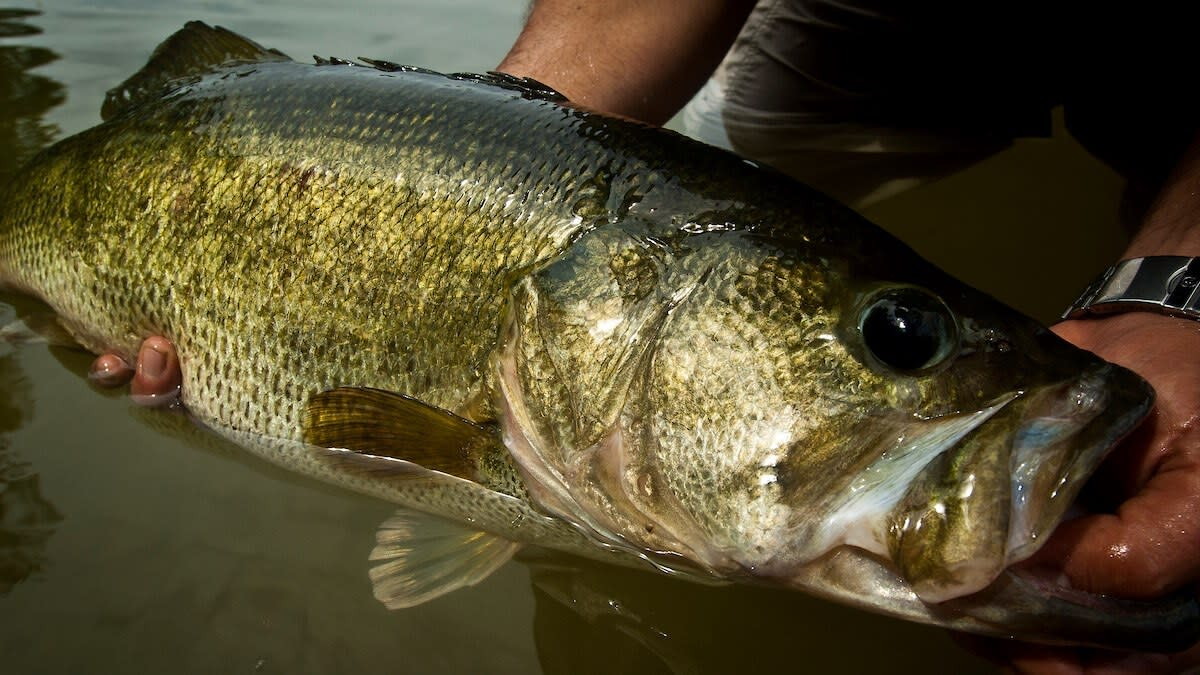

##  We will predict(estimate) the weight of the fish based on species name of fish, vertical length, diagonal length, cross length, height, and diagonal width using linear models.

### Importing necessary libraries

In [1]:
#Basic Analysis & Visualisation libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Data Preprocessing & Splitig libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

#Machine Learning Alogorithms libararies
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score

#Machine Learning Model evaluation libraries
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
#Load the dataset
df=pd.read_csv('./Fish.csv')

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
df.shape

(159, 7)

In [7]:
df.duplicated().sum()

0

In [8]:
df.Weight.value_counts()

300.0     6
1000.0    5
500.0     5
120.0     5
700.0     5
         ..
60.0      1
55.0      1
800.0     1
306.0     1
19.9      1
Name: Weight, Length: 101, dtype: int64

In [9]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## Univariate Analysis

### Hist plot

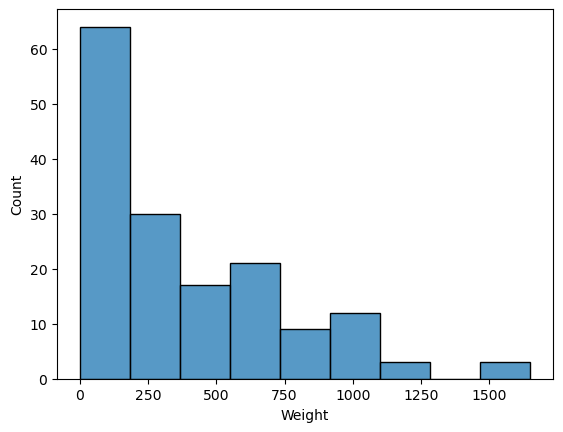

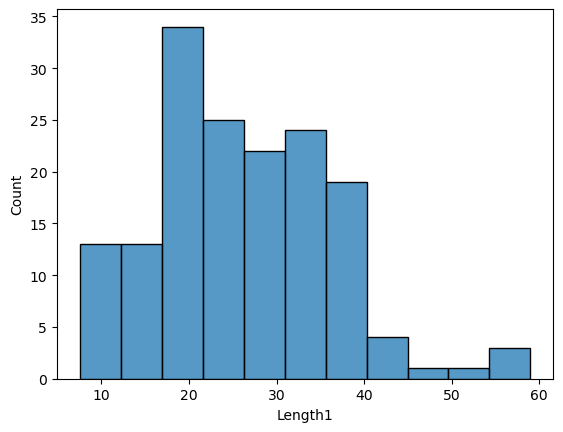

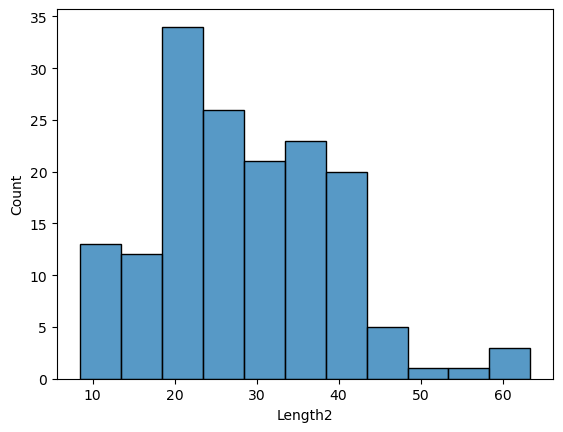

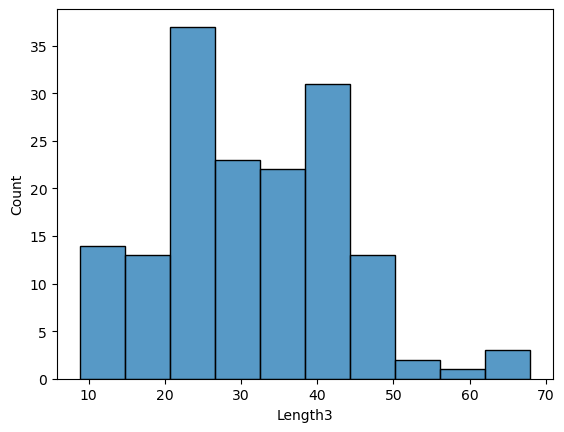

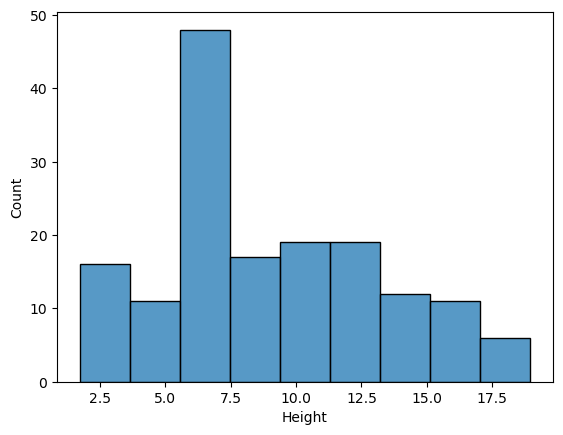

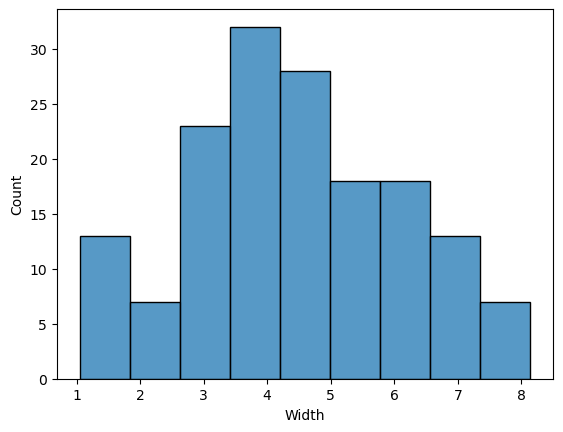

In [10]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i])
        plt.show();

### KDE plot

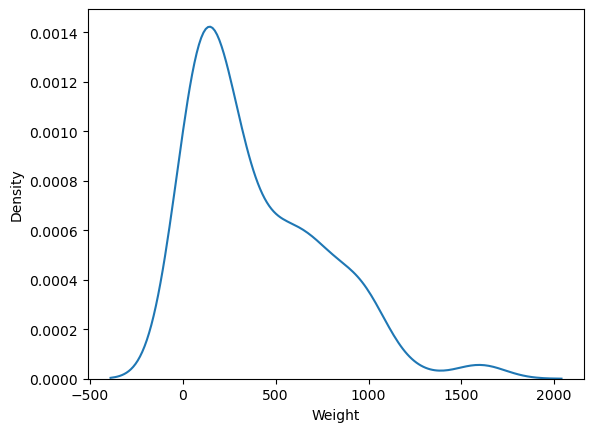

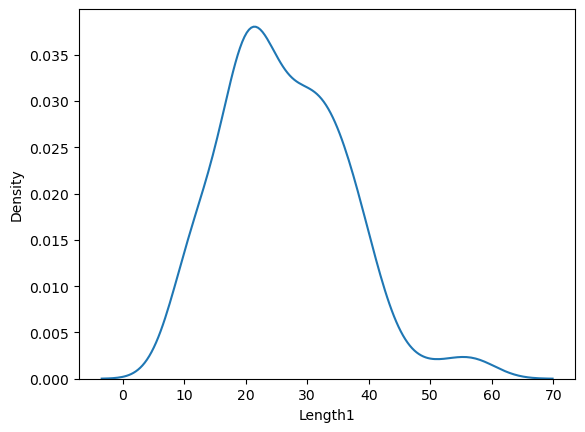

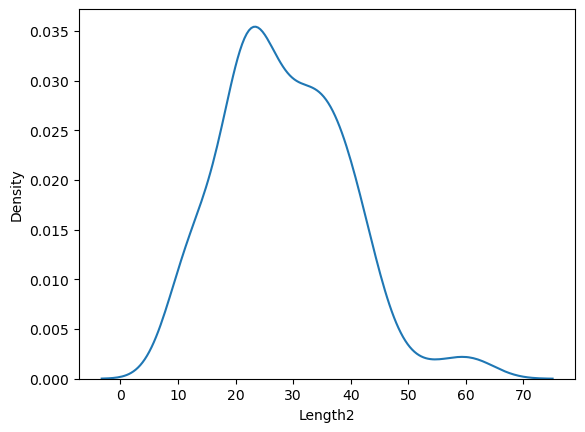

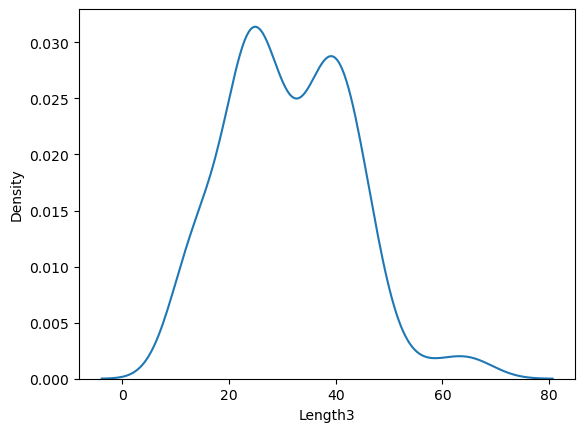

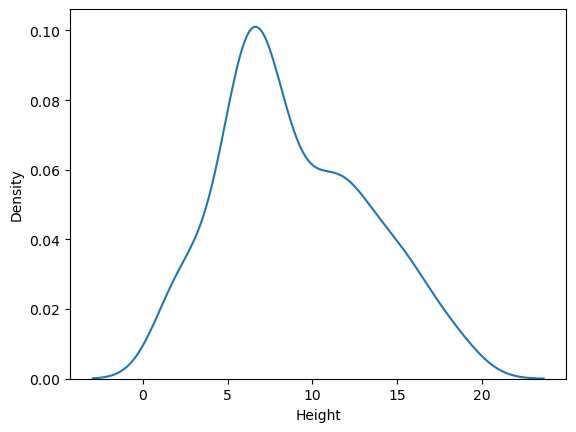

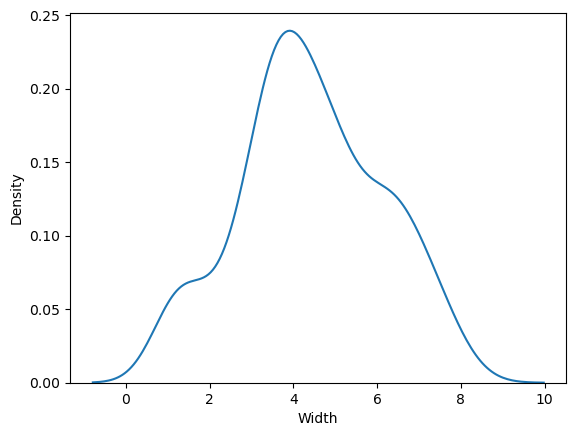

In [11]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.kdeplot(x=df[i])
        plt.show();

### Box plot

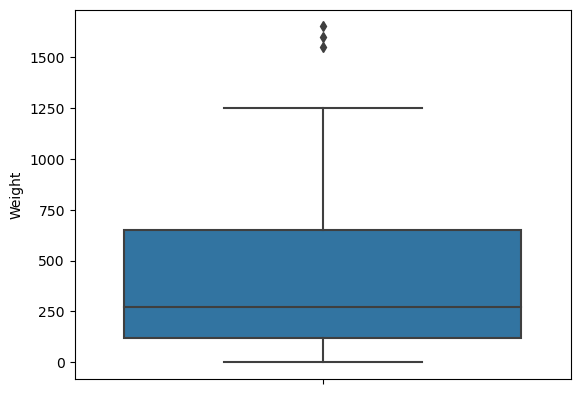

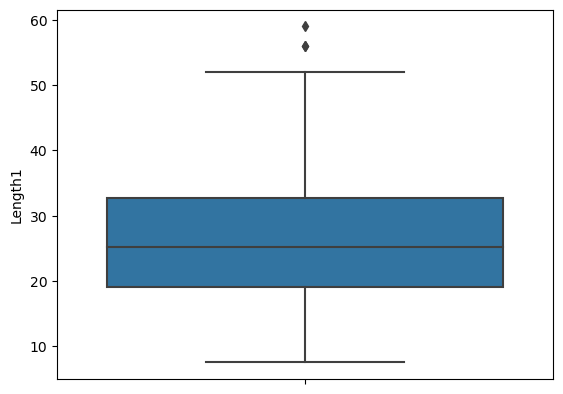

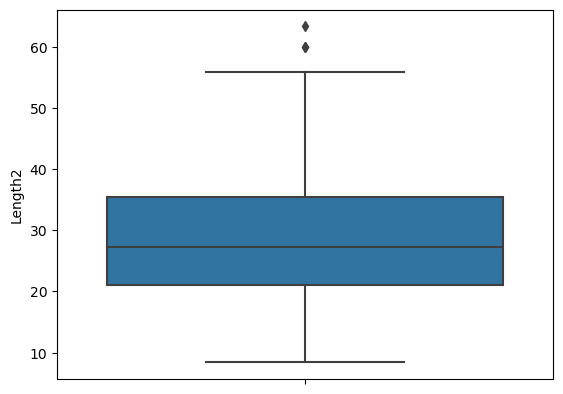

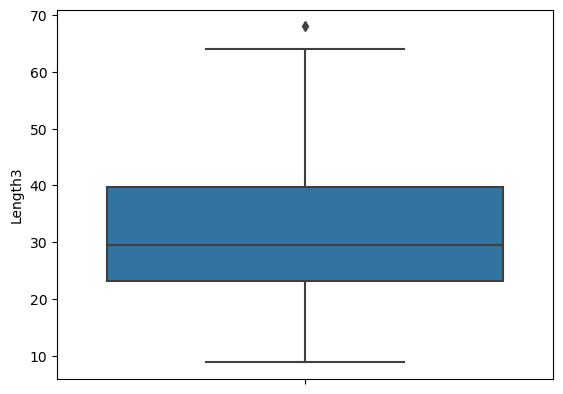

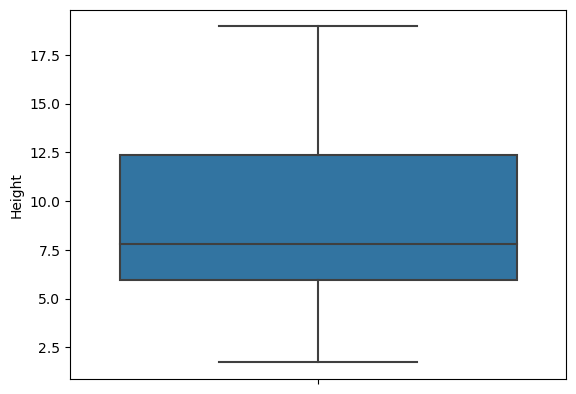

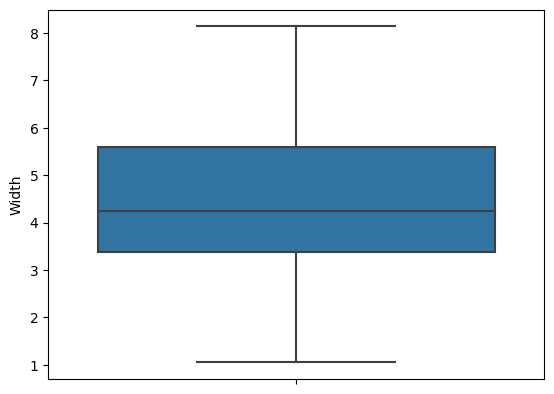

In [12]:
for i in df.columns:
     if df[i].dtypes !='object':
            sns.boxplot(y=df[i])
            plt.show()

## Multivariate Analysis

### Line plot

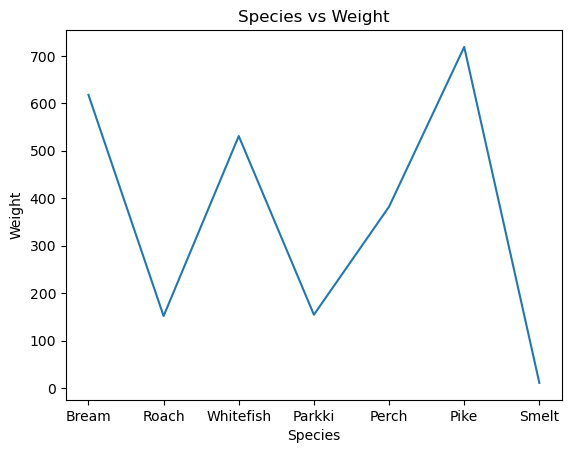

In [13]:
sns.lineplot("Species","Weight",data=df,ci=None)
plt.title("Species vs Weight")
plt.show()

### Pie plot

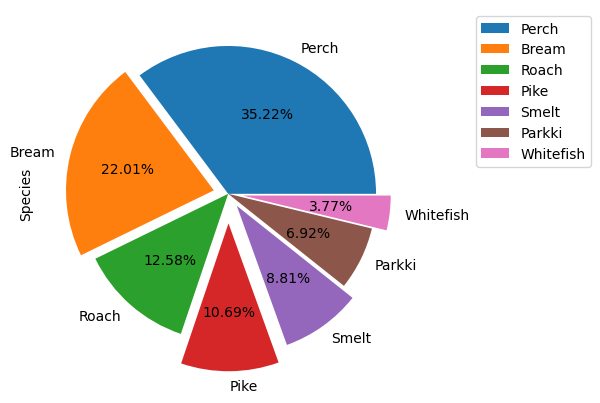

In [14]:
myexplode=[0,0.1,0,0.2,0.1,0,0.1]
x=df.Species.value_counts().plot.pie(autopct="%1.2f%%",explode=myexplode);
plt.legend(bbox_to_anchor=(1.5,1))
plt.show();


### Bar plot

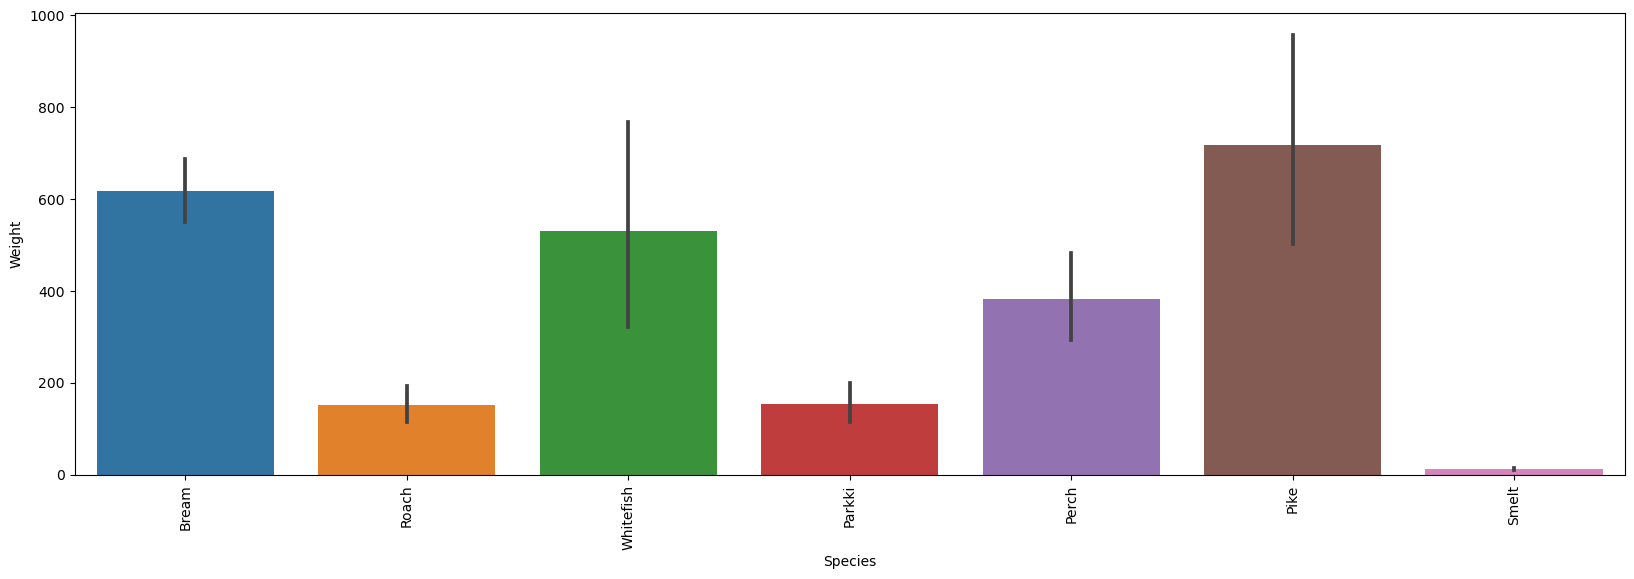

In [15]:
plt.figure(figsize=(20,6))
sns.barplot(x='Species',y="Weight", data=df);
plt.xticks(rotation=90)
plt.show()

### Scatter plot

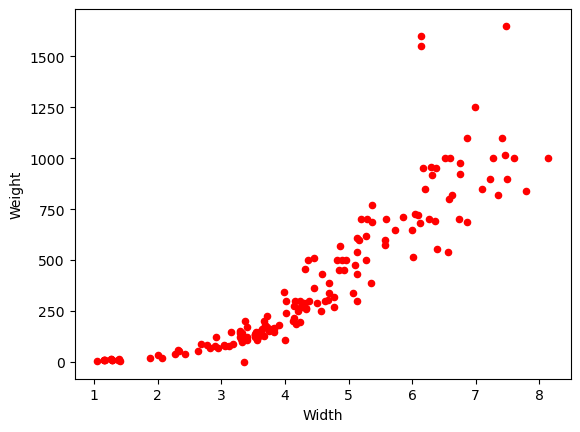

In [16]:
df.plot.scatter(x="Width",y="Weight",color="red");

### Pairplot

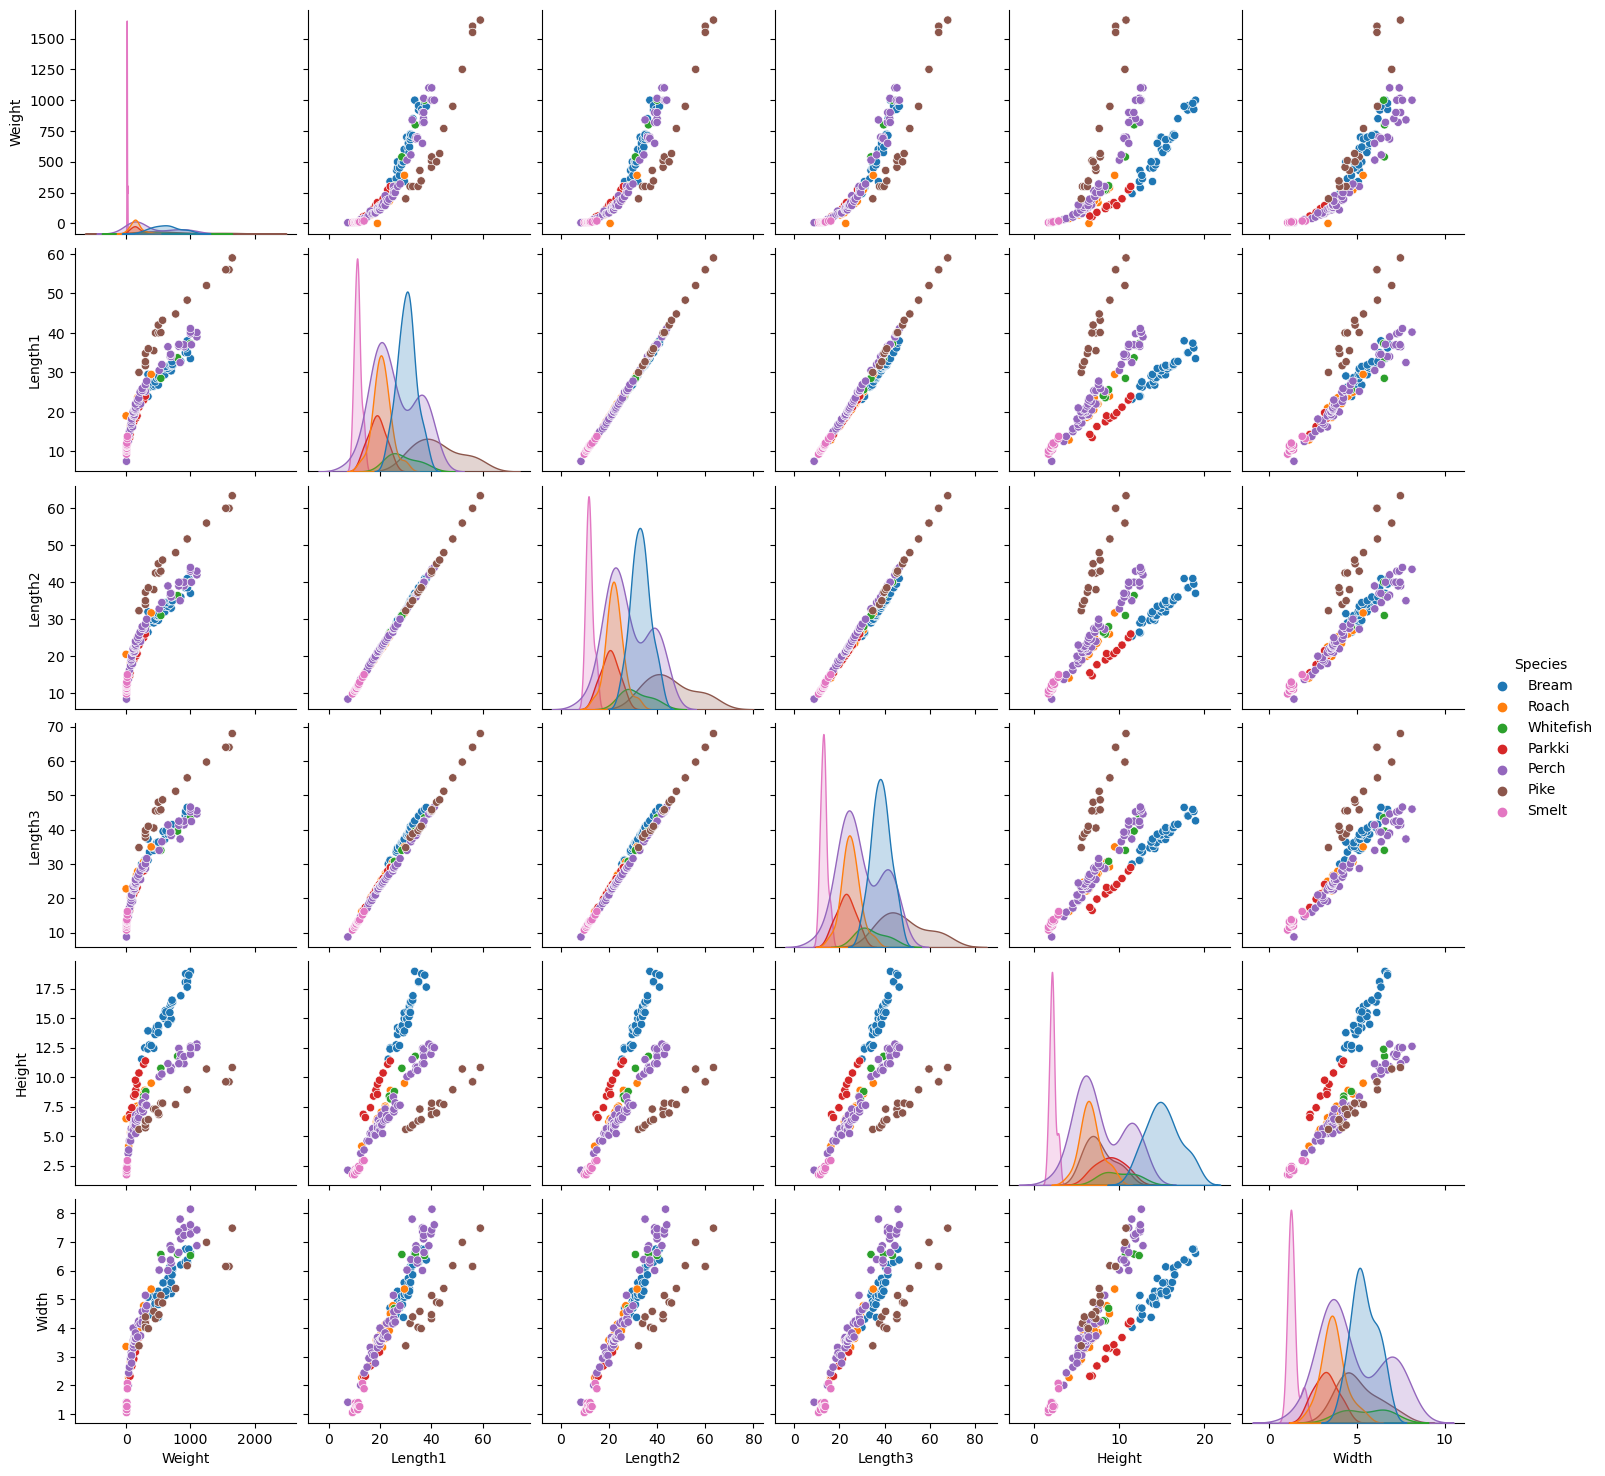

In [17]:
sns.pairplot(df, kind='scatter', hue='Species');  

### Subplots

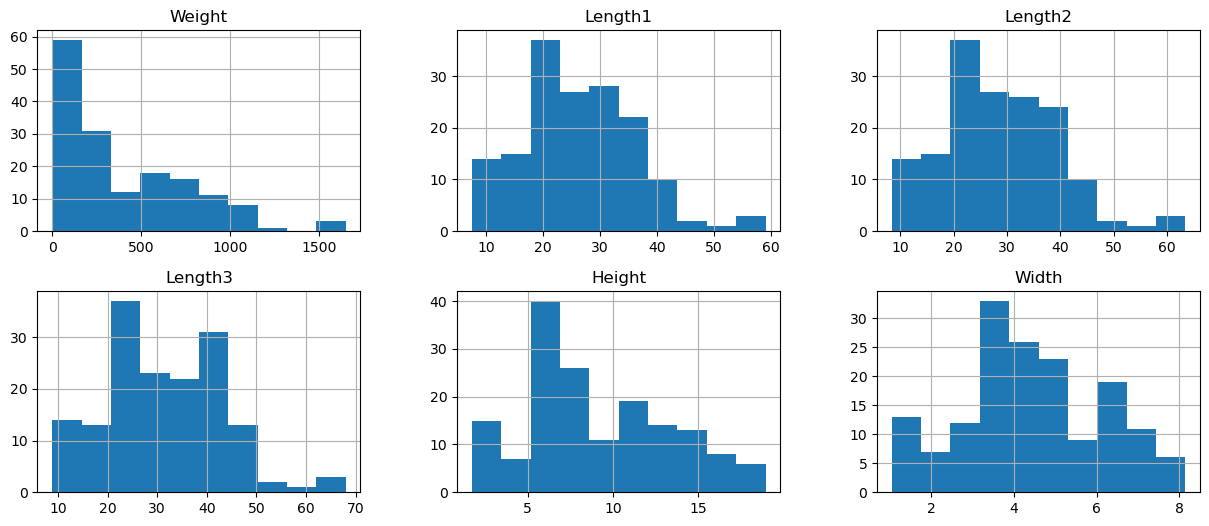

In [18]:
df_num = df.drop(columns=["Species"])

fig, axes = plt.subplots(len(df_num.columns)//3, 3, figsize=(15, 6))
i = 0
for triaxis in axes:
    for axis in triaxis:
        df_num.hist(column = df_num.columns[i], ax=axis)
        i = i+1
     

### Treating outliers

In [19]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL


In [20]:
for column in df.columns:
    if df[column].dtype !="object":
        UL,LL=outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

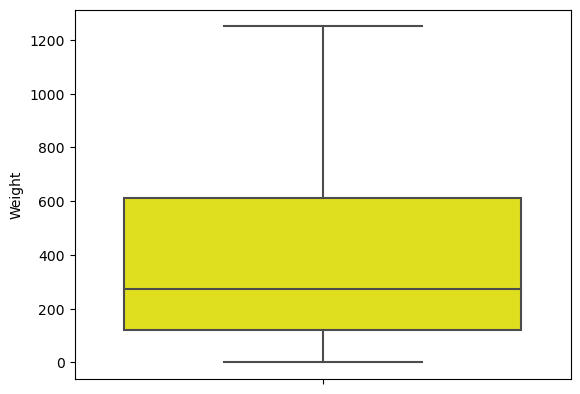

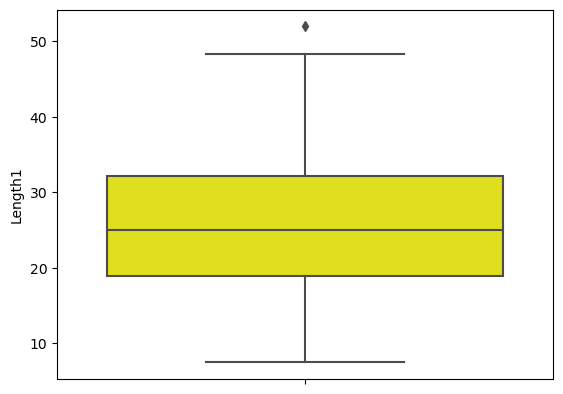

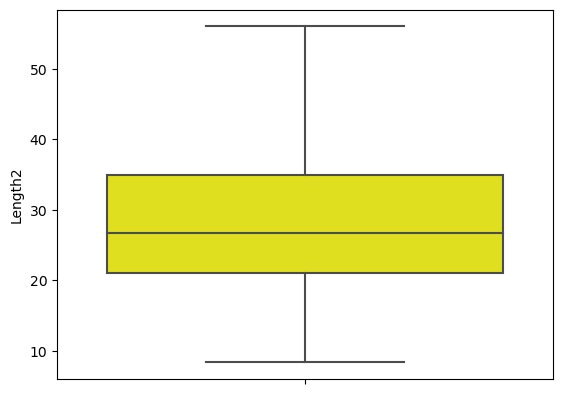

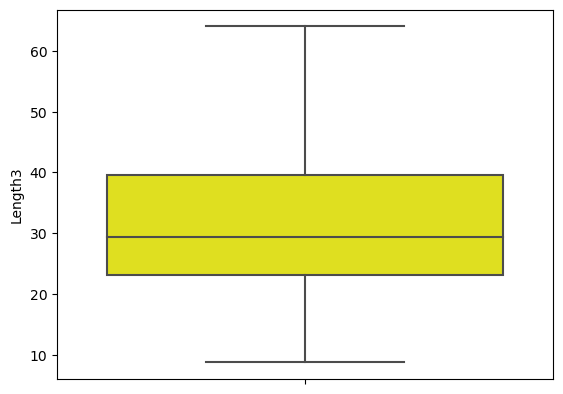

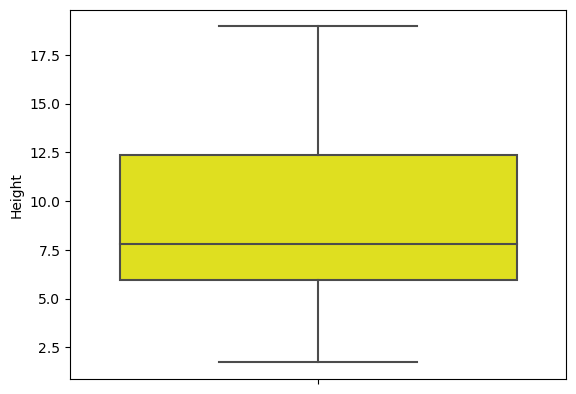

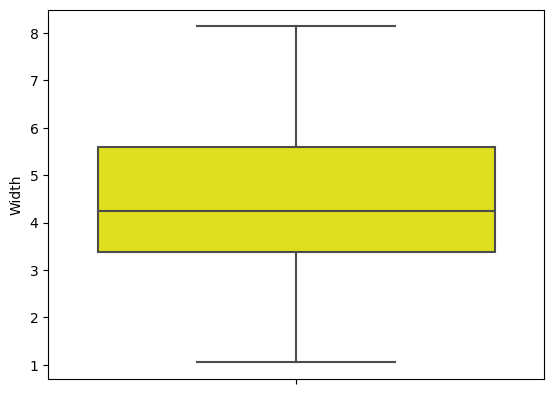

In [21]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i],color='yellow')
        plt.show();

In [22]:
df.dropna(inplace=True)

### Checking the correlation with the target 'Fish Weight'

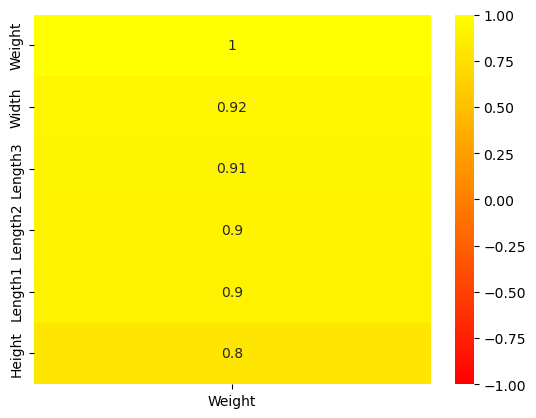

In [23]:
sns.heatmap(df.corr()[["Weight"]].sort_values(by="Weight", ascending=False), vmin=-1, vmax=1, annot=True,cmap="autumn");

In [24]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

### Lets take only the columns with good correlation with the target

In [25]:
x=df[['Length1', 'Length2', 'Length3', 'Height',
       'Width']].values

In [26]:
y=df[['Weight']].values

### Feature Scaling

In [27]:
sc=StandardScaler()

In [28]:
x=sc.fit_transform(x)

### Model buliding

In [29]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [30]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  140.26006476442495
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  139.60919706929295
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  313.7258774038347
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  115.849355188868
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  73.83901325194931
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  104.8455187707646
***************************************************

### Selecting random forest regressor as it is having best metrics

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [32]:
model=RandomForestRegressor()

In [33]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [34]:
y_pred = model.predict(x)

In [35]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [36]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,242.0,255.20
1,290.0,303.47
2,340.0,324.12
3,363.0,378.01
4,430.0,438.51


### Scatter plot

In [41]:
model.score(x,y)*100

99.00742051682319

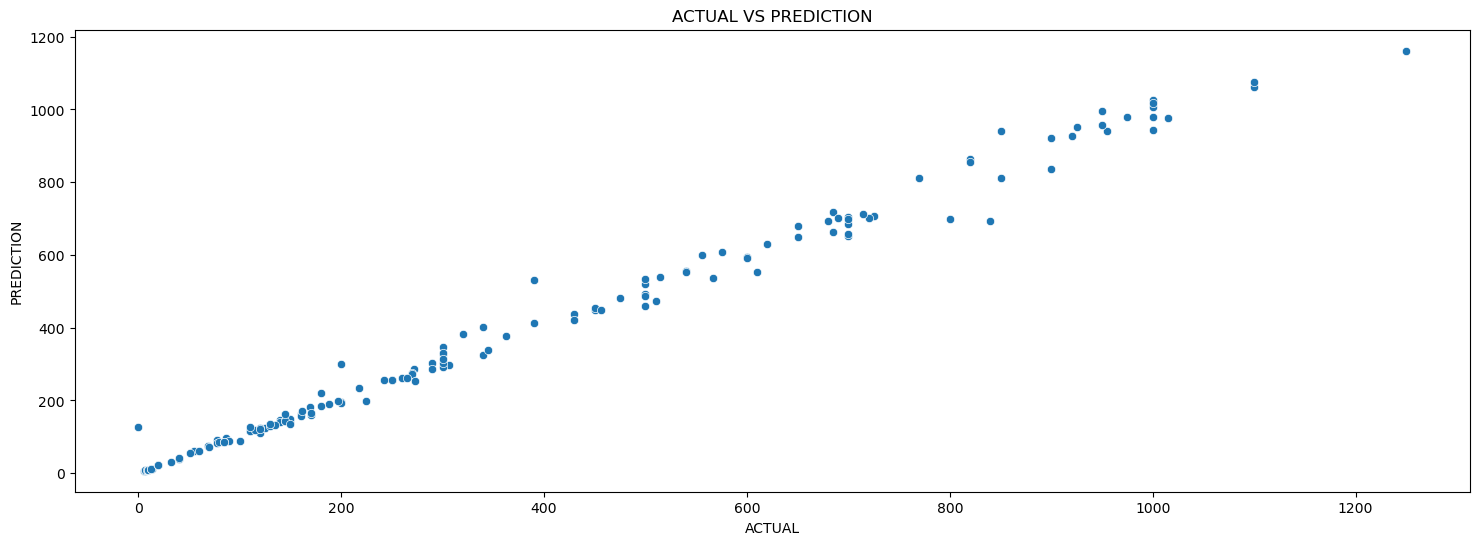

In [40]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data= OUTPUT, x="ACTUAL", y="PREDICTION");